# MINE 4201 - Laboratorio 0

Este notebook esta basado en el material de introducción a pandas disponible en 

https://pandas.pydata.org/docs/getting_started/

El laboratorio 0 esta diseñado para familiarizar al estudiante con la ejecución de cuadernos de jupyter notebook y pandas, una librería de python para la manipulación y análisis de datos.

La librería de pandas maneja datos tabulares (filas y columnas) usando como abstracción un [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) que tiene filas y columnas.
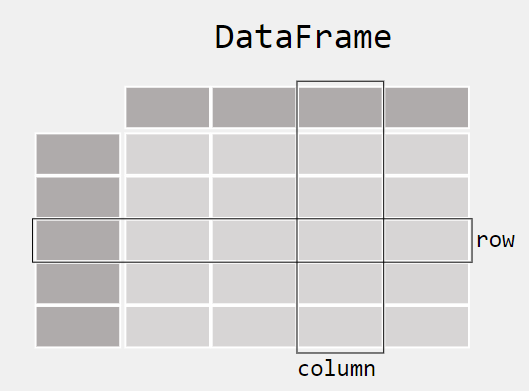

Ejecute una a una las celdas, lo puede hacer con el botón run, o al estar parado en una celda puede ejecutarla presionando shift+enter




In [ ]:
import pandas as pd
import csv
import numpy as np
%matplotlib inline

## Carga de datos a DataFrame y exploración inicial de datos

Para el ejercicio de familiarización con pandas vamos a utilizar el dataset de Book-Crossing, este dataset fue recolectado por Cai-Nicolas Ziegler en Agosto a Septiembre de 2004. Para más información sobre la plataforma puede acceder a la comunidad de [Book-Crossing](https://www.bookcrossing.com/?). 
Los datos contienen información acerca de 278,858 usuarios, con 1,149,780 ratings (opiniones) sobre 271,379 libros.

Los archivos pertinentes están descargados en la carpeta data en formato csv. Puede encontrar más información acerca del dataset en este [sitio](http://www2.informatik.uni-freiburg.de/~cziegler/BX/)

En las siguientes celdas, se cargan los archivos de ratings, libros e usuarios en un DataFrame



In [ ]:
df_ratings= pd.read_csv('data/BX-Book-Ratings.csv',sep=';',quotechar='"', encoding = 'ISO-8859-1')

In [ ]:
df_books= pd.read_csv('data/BX-Books.csv',sep=';',quotechar='"', escapechar='\\', encoding = 'ISO-8859-1')

In [ ]:
df_users = pd.read_csv('data/BX-Users.csv',sep=';',quotechar='"', escapechar='\\', encoding = 'ISO-8859-1')

Un DataFrame de pandas es una estructura 2-dimensional de filas y columnas. Se puede imprimir por la salida el contenido de un dataframe simplemente con una instrucción que llame al dataframe. También se pueden inspeccionar las primeras o últimas n filas del DataFrame utilizando el método head() o tail(), o realizar un muestreo de n líneas con el método sample()

In [ ]:
type(df_users)

In [ ]:
df_users

In [ ]:
#Tupla python que contiene las dimensiones del dataframe
df_users.shape

In [ ]:
df_users.head()

In [ ]:
df_users.tail()

In [ ]:
df_users.sample(8)

In [ ]:
#TODO: 
#Utilice las siguientes líneas para revisar las primeras 8 líneas, las últimas 8 líneas y un muestreo del dataframe de libros (df_books) 

In [ ]:
df_books.?

In [ ]:
df_books.?

In [ ]:
df_books.?

## Atributos de un DataFrame

El índice de un dataframe hace referencia a la primera columna(en negrilla), es un identificador de cada fila. En este caso pandas generó una secuencia de enteros desde 0 al número de filas al leer el archivo, pero este índice puede ser sustituido por cualquier otra columna del DataFrame

In [ ]:
df_users.index

Las columnas de un DataFrame también tienen un identificador

In [ ]:
df_users.columns

Por último, cada columna tiene un tipo de dato inferido por la libreria al momento de realizar la carga

In [ ]:
df_users.dtypes

## Selección y manejo de índices

Es posible seleccionar información de los DataFrame a partir de los índices de filas y columnas (primera fila y primera columna cuando se imprime un dataframe). Estos índices permiten acceder a un subconjunto del DataFrame principal y cambiar la información almacenada en el DataFrame. 

### Selección de columnas

Se puede seleccionar una columna mediante el uso de los corchetes cuadrados. En las siguientes celdas accedemos a la columna User-ID, o a un conjunto de columnas. Acceder a una sola columna es un objeto de tipo [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html), acceder a múltiples columnas resulta en un objeto tipo DataFrame
 

In [ ]:
df_users['User-ID']

In [ ]:
#Cuando el nombre de la columna es un nombre de atributo válido de python, puede ser accedida como atributo
df_users.Age

In [ ]:
df_users['User-ID'].shape

In [ ]:
type(df_users['User-ID'])

In [ ]:
type(df_users.Age)

In [ ]:
df_users[['User-ID', 'Location']]

In [ ]:
df_users[['User-ID', 'Location']].shape

In [ ]:
type(df_users[['User-ID', 'Location']])

### Agregaciones por columnas
A una serie o a un dataframe se le pueden calcular funciones de agregación
Por ejemplo el promedio de edad de los usuarios (ignora NaN)

In [ ]:
df_users['Age'].mean()

In [ ]:
df_users['Age'].max()

In [ ]:
# Se pueden llamar varias funciones al tiempo
df_users['Age'].agg(['mean','sum'])

In [ ]:
df_ratings.max(axis=0)

### Filtrar filas y columnas por condiciones
Se utiliza también la sintaxis de los corchetes cuadrados, 
Quiero acceder a las filas que tienen usuarios mayores de 60 años y guardarlo en el DataFrame df_users_senior

In [ ]:
df_users_senior=df_users[df_users['Age']>60]

In [ ]:
df_users_senior

La condición `df_users['Age']>60` genera un vector binario, que es utilizado como una máscara binaria para acceder solamente las posiciones del DataFrame que cumplen con la condición

In [ ]:
df_users['Age']>60

In [ ]:
type(df_users['Age']>60)

In [ ]:
#Negación de la condición
~(df_users['Age']>60)

In [ ]:
#Acceso a las filas con máscara inversa a la condición
df_users[~(df_users['Age']>60)]

In [ ]:
# Comparación contra nan
df_users[df_users['Age'].isna()]

In [ ]:
#And de condiciones, menores a 60 y mayores de 18
df_users[(df_users['Age']<60)& (df_users['Age']>18)]

In [ ]:
#TODO: 
#Utilice las siguiente líneas para guardar en un nuevo DataFrame llamado df_books_old los libros que fueron publicados antes de 1900 y se conoce su año de publicación (diferente de 0)

In [ ]:
df_books_old = ?

In [ ]:
df_books_old

In [ ]:
assert(df_books_old.shape[0]==4)

### Uso de indexador .loc y .iloc

- El indexador .loc[index_fila, index_columna] permite acceder a filas o a columnas bien sea por el valor del índice o por medio de arreglos binarios. 
- El indexador .iloc[pos_fila, pos_columna] permite acceder a filas o columnas por medio de referencias a posición dentro del DataFrame o arreglo

In [ ]:
# Ejemplo solamente usando el valor del índice de filas, fila con indice con valor 3
df_users.loc[3]

In [ ]:
# Ejemplo usando indexador de fila y columna, fila con índice valor 3 y columna Age
df_users.loc[3,'Age']

In [ ]:
# Ejemplo usando indexador de fila y columna con arreglos binarios (máscara)
# Usuarios con edad superior al promedio, todas las columnas
df_users.loc[df_users['Age']>df_users['Age'].mean(),:]

In [ ]:
# Uso de iloc, dos primeras columnas del dataframe, la sintaxis 0:2 es la forma de realizar indexación de listas en python
df_users.iloc[:,0:2]

In [ ]:
#TODO: 
#Utilice las siguiente líneas para guardar en un nuevo DataFrame llamado df_books_latest los libros que fueron publicados durante los últimos 5 años(tomando como base el año del libro con año mayor)

In [ ]:
df_books_latest=?

In [ ]:
df_books_latest


In [ ]:
assert(df_books_latest.shape[0]==2)

# Creacion de columnas derivadas
A un dataframe se le pueden crear columnas a partir de otras columnas

In [ ]:
# Creacion de columna a partir de otra serie
df_users['Adult']=df_users['Age']>=18

In [ ]:
df_users

In [ ]:
# Creación de columna con broadcasting, un unico valor se replica , ver https://numpy.org/doc/stable/user/basics.broadcasting.html
df_users['constante']=5

In [ ]:
df_users

In [ ]:
df_users['Age-squared']=df_users['Age']**2

In [ ]:
df_users

## Función apply 
La función apply permite aplicar la misma función de agregación a todas las filas (o columnas) de un dataframe, resulta util para crear nuevas columnas cuando se aplica a un DataFrame o a una Series

La función [apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html), cuando se realiza sobre un DataFrame recibe el parámetro axis, con valor por defecto 0. Este parámetro indica en qué dirección se aplica la agregación. Cuando el eje (axis) es 0 se aplica la función sobre las filas, por lo que se obtendrá una Serie de tamaño del número de columnas del DataFrame. Cuando el eje es 1 se aplica la función sobre las columnas, por lo que se obtendrá como resultado una Serie del tamaño del número de filas.

![titulo](imgs/pandas_axis.png)

In [ ]:
# Se aplica función max por columna  sobre selección de DataFrame, apply con axis=0
df_users[['User-ID','constante']].apply(max)

In [ ]:
# Se aplica función max por fila sobre selección de DataFrame, apply con axis=1
df_users[['User-ID','constante']].apply(max, axis=1)

## Funciones vectorizadas str

A las series que son de tipo String se les puede aplicar directamente funciones vectorizadas de forma más eficiente sin necesidad de llamar un apply. 

En [este](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#string-methods) enlace puede revisar las funiones que se le pueden aplicar a una serie que es cadena de texto. Para llamar estas funciones es necesario llamar la propiedad str sobre la serie

In [ ]:
# Ejemplo: Extraer el pais de los usuarios
df_users['pais']=df_users['Location'].str.split(",").str.get(2).str.strip()

In [ ]:
df_users.head(9)

## Funciones definidas por el usuario en apply

Dentro de un apply, es posible definir funciones de agregación propias del usuario.

In [ ]:
def esta_norteamerica(row):
    location=row['Location'].split(',')[-1].strip()
    return (location in ['usa','mexico','canada'])

In [ ]:
df_users['esta_en_norteamerica']=df_users.apply(esta_norteamerica, axis=1)

In [ ]:
df_users

## Funciónes lambda en python

Las funciones lambda son funciones que son anónimas, es decir, no hay que declararles un nombre.

Las funciones lambda resultan de gran utilidad para trabajar con DataFrames dentro la función apply, nos permiten definir rápidamente funciones de agregación de filas arbitrarias para transformar nuestros datos. 

Dentro de las funciones lambda no se puede imprimir, ni se pueden generar excepciones

A continuación se muestra un ejemplo de una función lambda simple, que suma 1 al parámetro suministrado

In [ ]:
funlambda_ejemplo = lambda x: x +1 

In [ ]:
type(funlambda_ejemplo)

In [ ]:
funlambda_ejemplo(40)

Al usar una función lambda sobre una función de apply, puedo combinar las columnas para obtener por ejemplo, columnas derivadas que dependen del valor de otras

In [ ]:
df_users[df_users.pais.isna()]

In [ ]:
# Ejemplo: Columna derivada
# row se vuelve un parámetro por donde se va a recibir cada una de las filas, sumemos 5 años a la edad y concatenemos el pais
df_users.apply(lambda row:  str(row['Age']+5)+" "+str(row['pais']) , axis=1)

Este es un ejemplo de uso de una función lambda dentro de un apply, pero no siempre es la mejor opción

En lo posible debe hacer uso de las funciones que ya vienen implementadas dentro de la libreria pandas o numpy, ya que estas estan implementadas en cython y corren sobre código compilado. 

Nuestra función lambda se va a demorar en correr mucho más dado que esta siendo interpretada por python fila a fila.

La instruccion de notebook %timeit nos permite repetir una instruccion varias veces para revisar cuánto se demora en promedio. La instrucción del notebook %time ejecuta la operación una sola vez y mide cuánto se demoró.

Compare los tiempos que toma aplicar una función vectorizada implementada nativamente en cython vs la función lambda.

In [ ]:
%timeit -r 5 -n 10 df_users['Age']+5

In [ ]:
%time df_users.apply(lambda row:  row['Age']+5 , axis=1)

# Indexación .at
La indexación at es similar a la indexación loc e iloc at sirve para cambiar los datos del dataframe

In [ ]:
df_users

In [ ]:
#Cambio valores de nan a string vacio
df_users.at[df_users.pais.isna(),'pais']=''

In [ ]:
df_users.loc[df_users.pais.isna()]

In [ ]:
df_users.loc[df_users.pais=='']

Se desea crear en el DataFrame df_books una nueva columna llamada valid_ISBN para indicar si los códigos ISBN son válidos. La validación depende del número de dígitos que tiene el ISBN (10 o 13 dígitos). Puede utilizar las siguientes funciones copiadas de la libreria isbnlib.

In [ ]:
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

# pylint: disable=broad-except
def check_digit10(firstninedigits):
    """Check sum ISBN-10."""
    # minimum checks
    if len(firstninedigits) != 9:
        return ''
    try:
        int(firstninedigits)
    except Exception:  # pragma: no cover
        return ''
    # checksum
    val = sum(
        (i + 2) * int(x) for i, x in enumerate(reversed(firstninedigits)))
    remainder = int(val % 11)
    if remainder == 0:
        tenthdigit = 0
    else:
        tenthdigit = 11 - remainder
    if tenthdigit == 10:
        tenthdigit = 'X'
    return str(tenthdigit)


# pylint: disable=broad-except
def check_digit13(firsttwelvedigits):
    """Check sum ISBN-13."""
    # minimum checks
    if len(firsttwelvedigits) != 12:
        return ''
    try:
        int(firsttwelvedigits)
    except Exception:  # pragma: no cover
        return ''
    # checksum
    val = sum(
        (i % 2 * 2 + 1) * int(x) for i, x in enumerate(firsttwelvedigits))
    thirteenthdigit = 10 - int(val % 10)
    if thirteenthdigit == 10:
        thirteenthdigit = '0'
    return str(thirteenthdigit)


In [ ]:
#TODO: Calcule columna valid_ISBN
df_books['valid_ISBN']=?

# Sort, groupby

En esta sección se presenta el uso de funciones para crear nuevos dataframes a partir de la transformación de filas o columnas de un dataframe original


In [ ]:
#Ordenar dataframe por edad, de forma creciente
df_users.sort_values('Age')

In [ ]:
#Ordenar dataframe por edad, de forma decreciente
df_users.sort_values('Age', ascending=False)

In [ ]:
#Top 5 por edad, de forma creciente
df_users.nsmallest(5,'Age')

In [ ]:
#Top 5 por edad, de forma decreciente
df_users.nlargest(5,'Age')

Una operación groupby aplica una selección de un dataframe, a cada grupo de valores les aplica una operación de agregación y concatena los resultados.

In [ ]:
#Edad promedio de los usuarios por pais, el resultado es una Serie cuyo indice es el nombre del pais
df_users.groupby('pais')['Age'].mean()

In [ ]:
#Puede resultar conveniente manejar una serie como DataFrame, para eso existe el método to_frame
df_users.groupby('pais')['Age'].mean().to_frame()

In [ ]:
#Edad promedio, desviación estandar del promedio y número de personas por paism ordenado por conteo de usuarios por pais
df_users.groupby('pais')['Age'].agg(['mean','std','count']).sort_values('count', ascending=False)

In [ ]:
#TODO: Mediante un groupby obtenga la serie y el conteo de libros del top 5 de más autores que más libros tienen en el dataset (el nombre de los autores es el indice de la serie) 
series_top_autores=df_books.?

In [ ]:
assert(all([i in set(['Agatha Christie', 'William Shakespeare', 'Stephen King',
       'Ann M. Martin', 'Carolyn Keene']) for i in series_top_autores.index]))

# Merge y join

Para realizar las combinación de dos dataframes, se utilizan los métodos merge y join
* Join se usa para unir por  el índice del dataframe
* Merge se usa para unir por el valor de una columna del dataframe

In [ ]:
#La tabla de ratings tiene las opiniones que los usuarios han manifestado, realicemos un análisis del rating promedio por país

In [ ]:
df_ratings.head(10)

In [ ]:
# Documentación merge
help(pd.DataFrame.merge)

In [ ]:
df_ratings_pais=df_ratings.merge(df_users[['User-ID','pais']], on='User-ID', how='inner')

In [ ]:
df_ratings_pais

In [ ]:
#TODO: Calcule el promedio de ratings por pais y ordenelo de mayor a menor. Solamente tenga en cuenta los paises que tienen al menos 80 ratings